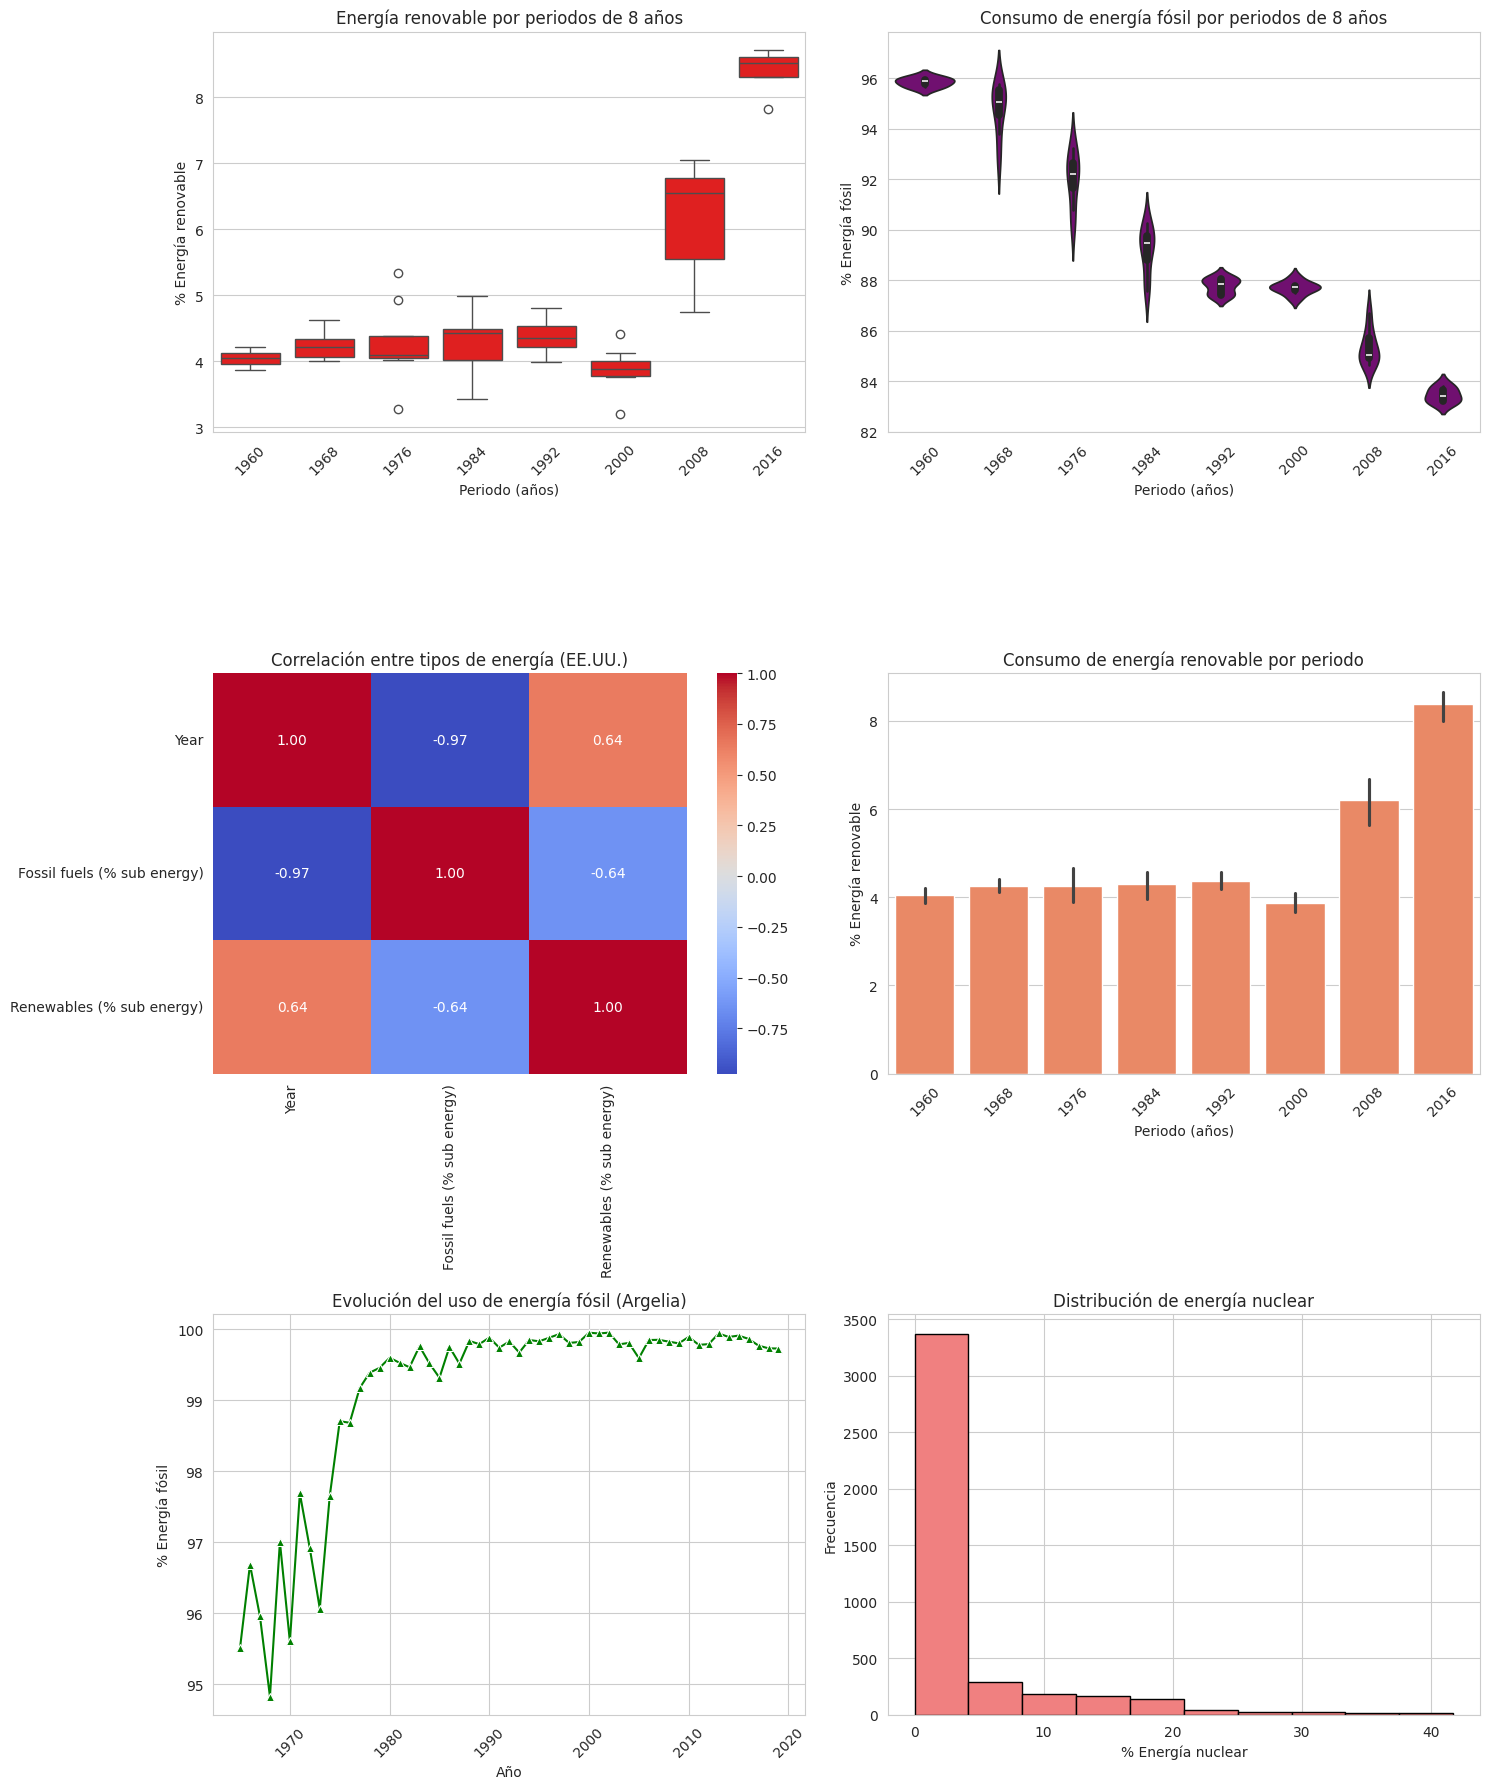

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
datos = pd.read_csv("Energy_Consumption_by_Source.csv")

# Datos de Estados Unidos
pais_us = "United States"
datos_us = datos[datos["Entity"] == pais_us].copy()
datos_us["Periodo_8"] = (datos_us["Year"] // 8) * 8

# Datos de Algeria para lineplot
pais_algeria = "Algeria"
datos_algeria = datos[datos["Entity"] == pais_algeria].copy()

# Crear figura y subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 18))  # 3 filas, 2 columnas
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# BOXPLOT
sns.set_style("whitegrid")
sns.boxplot(
    data=datos_us,
    x="Periodo_8",
    y="Renewables (% sub energy)",
    color="red",
    ax=axes[0, 0]
)
axes[0, 0].set_title("Energía renovable por periodos de 8 años")
axes[0, 0].set_ylabel("% Energía renovable")
axes[0, 0].set_xlabel("Periodo (años)")
axes[0, 0].tick_params(axis='x', rotation=45)
# HISTORIA: Esta grafica respresenta que Estados Unidos usaba muy poca energía renovable y casi no cambiaba.
# Con el tiempo empezó a subir un poco, y en los años más recientes aumentó mucho más.

# VIOLINPLOT
sns.violinplot(
    data=datos_us,
    x="Periodo_8",
    y="Fossil fuels (% sub energy)",
    color="purple",
    ax=axes[0, 1]
)
axes[0, 1].set_title("Consumo de energía fósil por periodos de 8 años")
axes[0, 1].set_ylabel("% Energía fósil")
axes[0, 1].set_xlabel("Periodo (años)")
axes[0, 1].tick_params(axis='x', rotation=45)
# HISTORIA: Ahora el grafico se ve como ha cambiado el uso de combustibles fósiles en E.U a lo largo del tiempo en un periodo de 8 años.

# HEATMAP
columnas = ["Year", "Fossil fuels (% sub energy)", "Renewables (% sub energy)"]
matriz_correlacion = datos_us[columnas].corr()
sns.heatmap(
    matriz_correlacion,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    ax=axes[1, 0]
)
axes[1, 0].set_title("Correlación entre tipos de energía (EE.UU.)")
# Historia: el heatmap muestra como se relacionan las energías entre sí con el paso del tiempo
# Los colores rojos significan que aumentan juntas, y los colores azules que cuando una sube, la otra baja.

# BARPLOT
sns.barplot(
    x="Periodo_8",
    y="Renewables (% sub energy)",
    data=datos_us,
    color="coral",
    ax=axes[1, 1]
)
axes[1, 1].set_title("Consumo de energía renovable por periodo")
axes[1, 1].set_ylabel("% Energía renovable")
axes[1, 1].set_xlabel("Periodo (años)")
axes[1, 1].tick_params(axis='x', rotation=45)

#  LINEPLOT
sns.set_style("darkgrid")
sns.lineplot(
    data=datos_algeria,
    x="Year",
    y="Fossil fuels (% sub energy)",
    marker="^",
    linestyle="-",
    color="green",
    ax=axes[2, 0]
)
axes[2, 0].set_title("Evolución del uso de energía fósil (Argelia)")
axes[2, 0].set_xlabel("Año")
axes[2, 0].set_ylabel("% Energía fósil")
axes[2, 0].tick_params(axis='x', rotation=45)

#  HISTOGRAMA
axes[2, 1].hist(
    datos['Nuclear (% sub energy)'],
    bins=10,
    color='lightcoral',
    edgecolor='black'
)
axes[2, 1].set_title("Distribución de energía nuclear")
axes[2, 1].set_xlabel("% Energía nuclear")
axes[2, 1].set_ylabel("Frecuencia")
# Historia: Muestra que la mayoría de los países usan muy poca energía nuclear, y solo pocos dependen de ella.

#  Guardar en alta calidad
plt.tight_layout()
plt.savefig("dashboard_energia.png", dpi=300)  # dpi=300 para alta calidad
plt.show()
